In [1]:
import numpy as np
import seaborn as sns

from zipfile import ZipFile
from matplotlib import pyplot as plt
from skimage.io import imread

from img_edit import auto_rotate_and_crop, best_rgb, rgb_to_color

sns.set_style(style='darkgrid')
plt.gray()

<Figure size 432x288 with 0 Axes>

In [2]:
path_list = []
with ZipFile('./toras.zip') as zip_file:
  for path in zip_file.namelist():
    if '__MAC' not in path \
        and '.JPG' in path:
      path_list.append(f'./toras.zip/{path}')

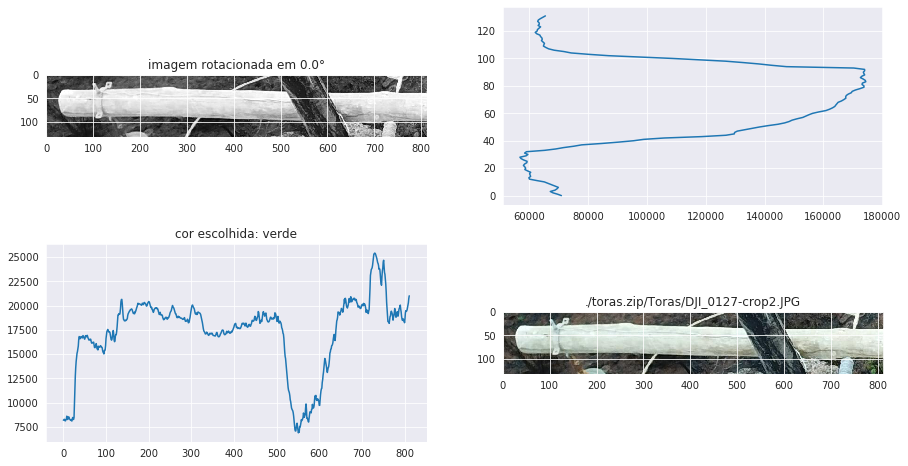

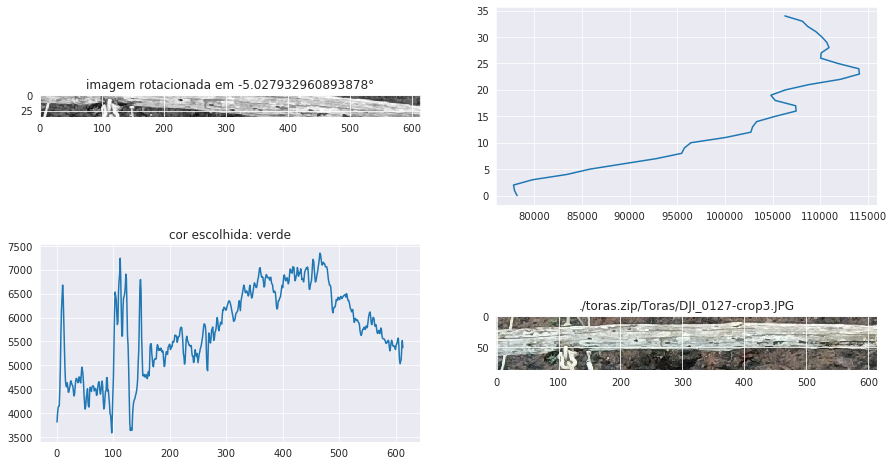

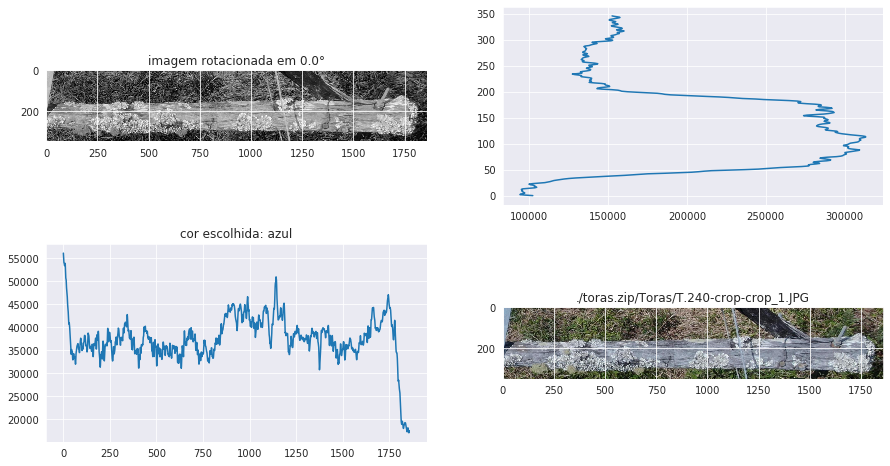

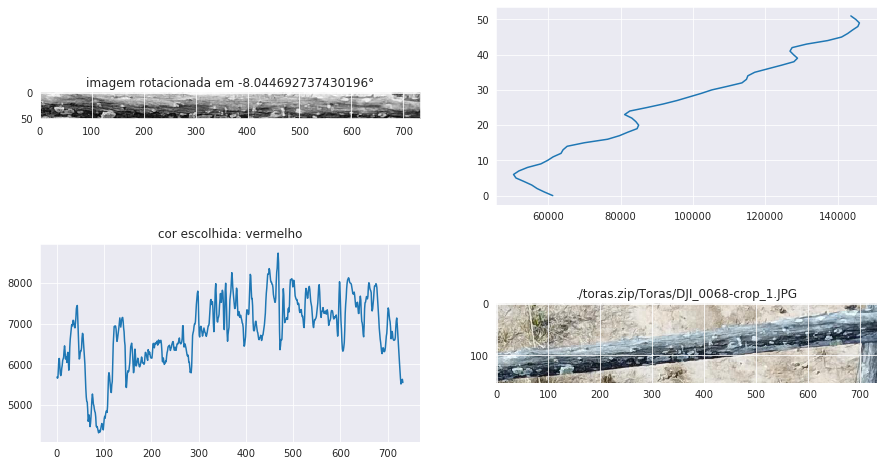

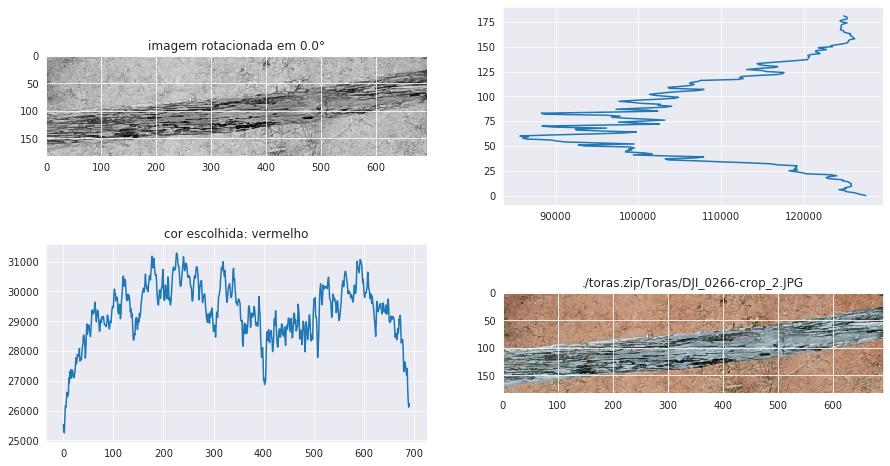

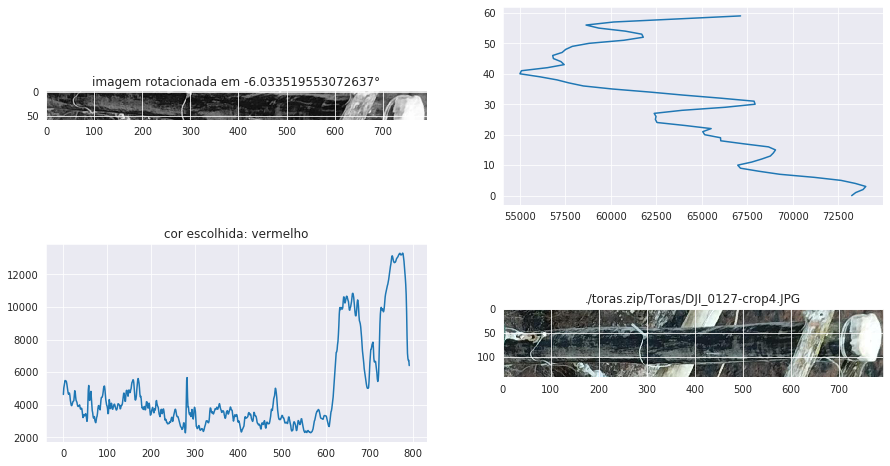

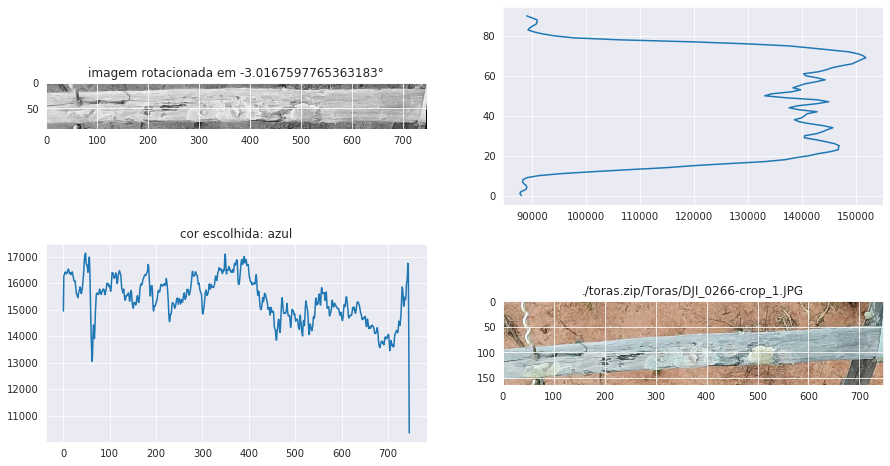

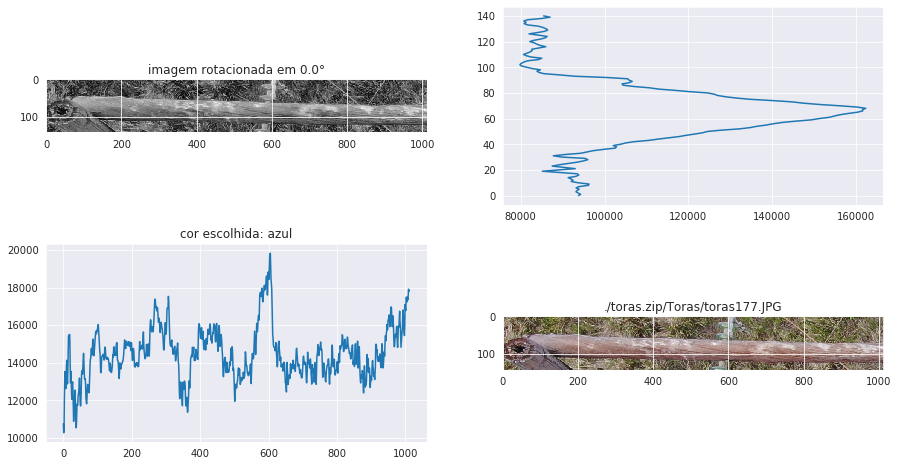

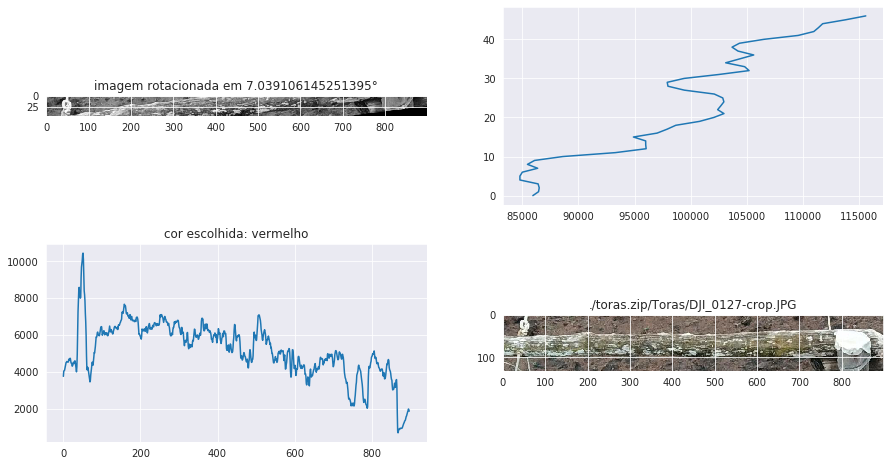

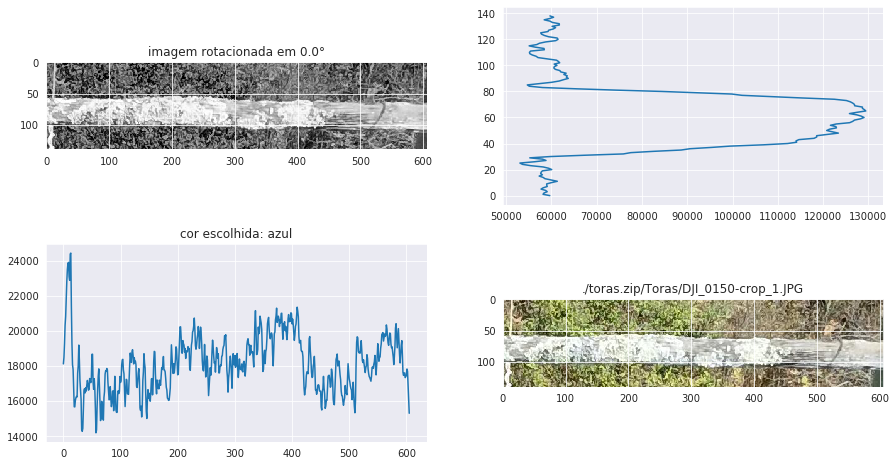

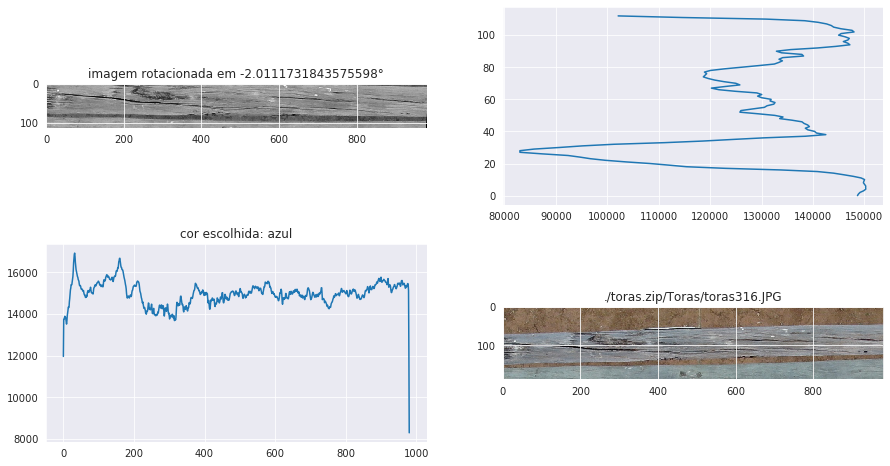

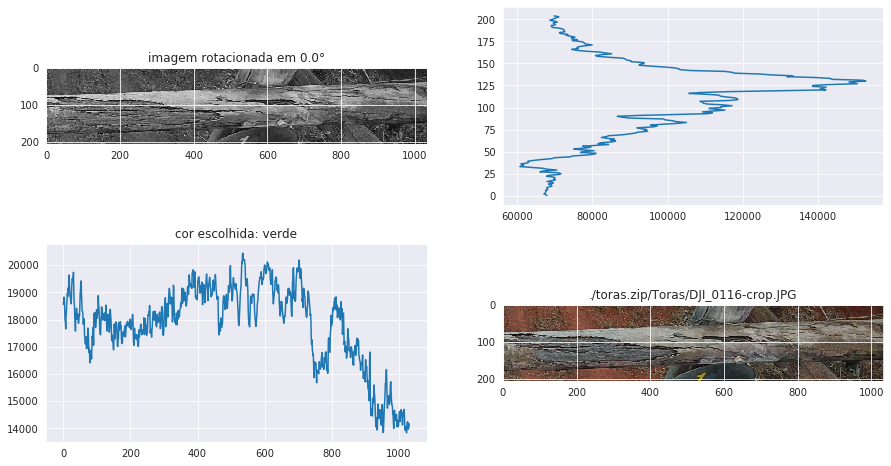

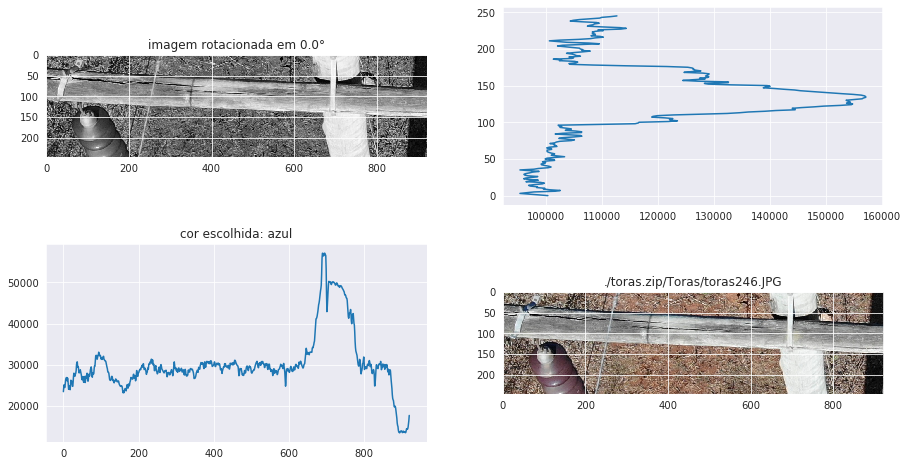

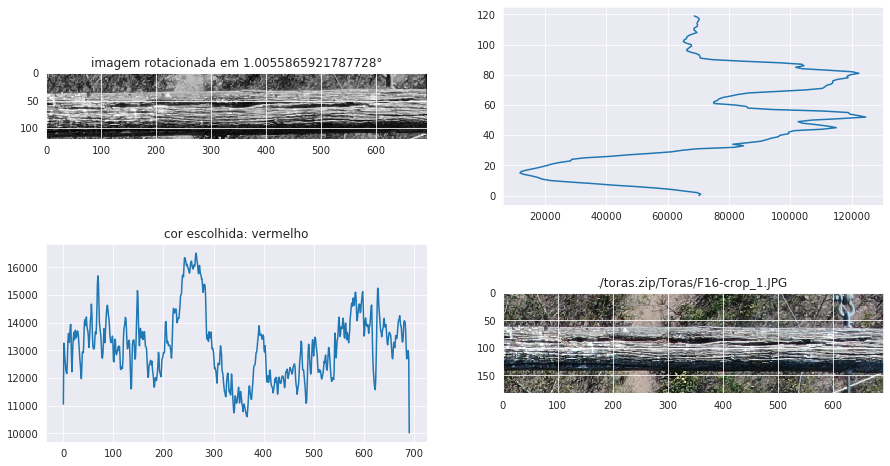

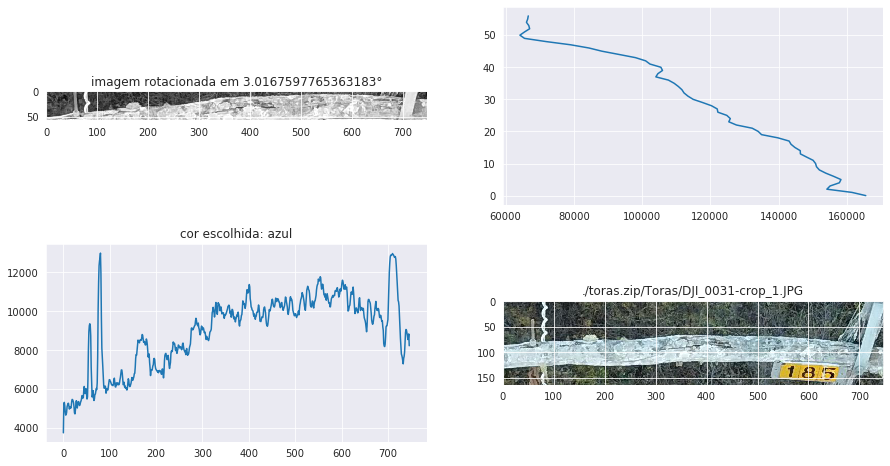

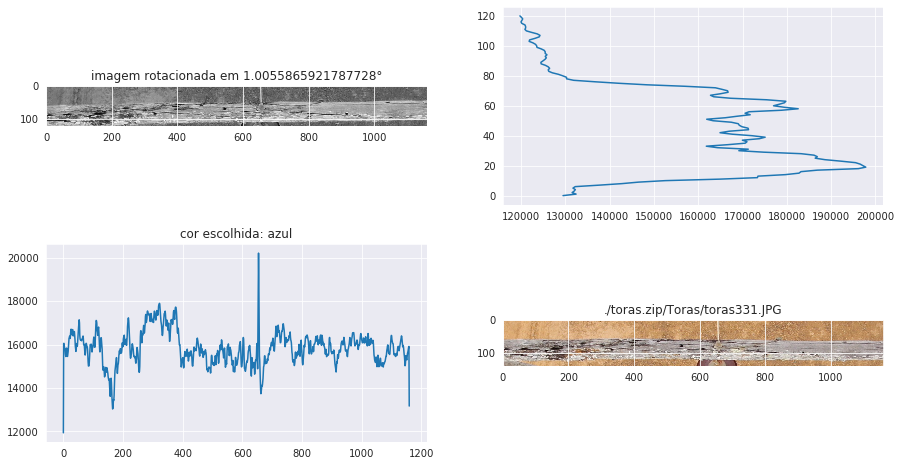

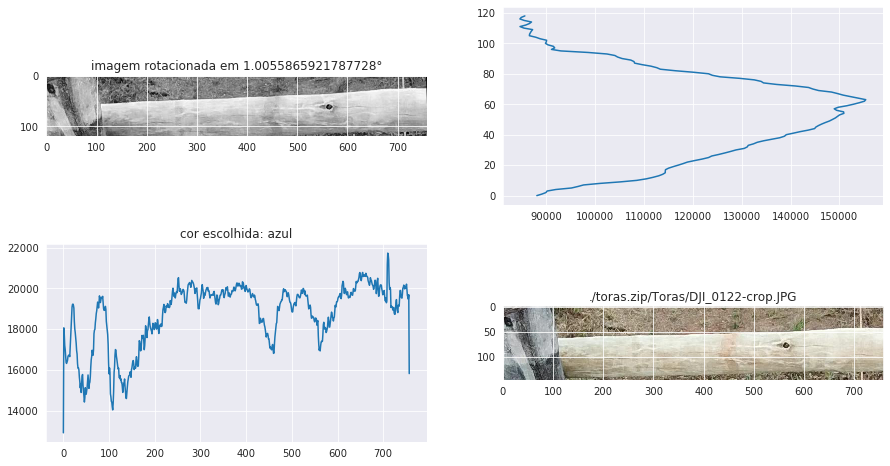

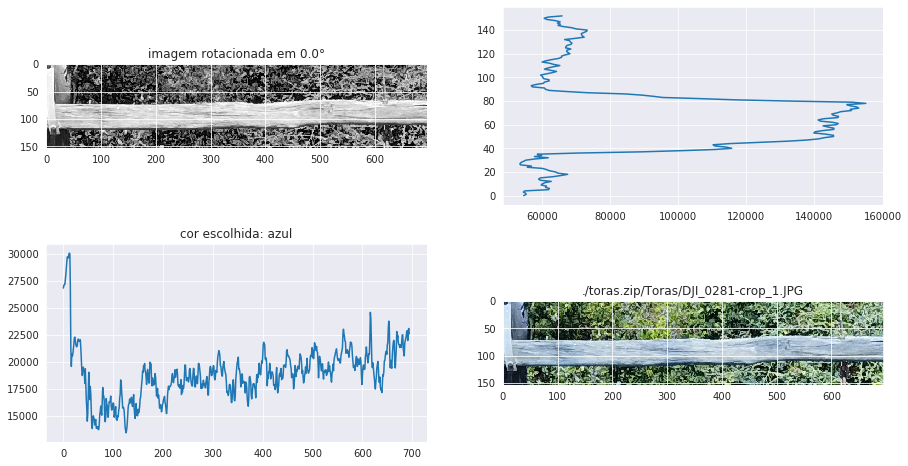

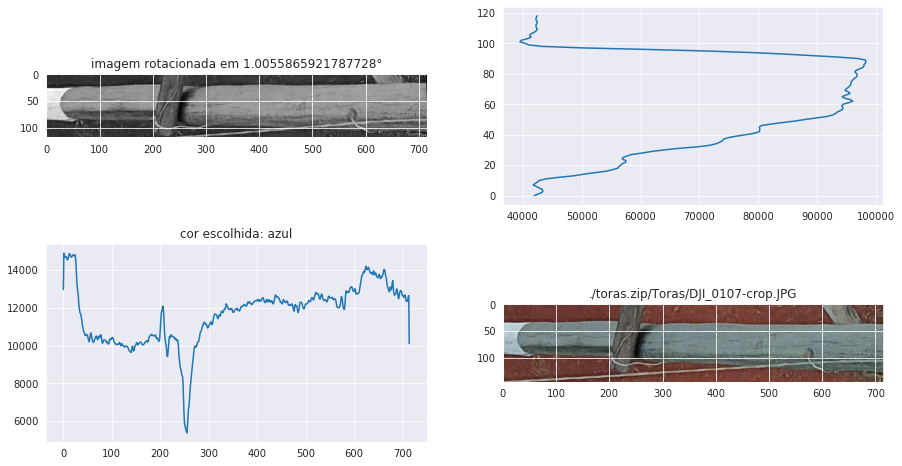

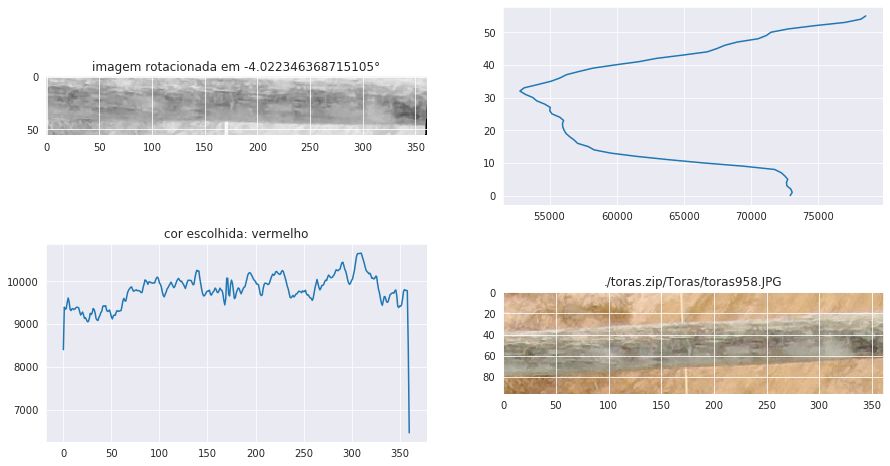

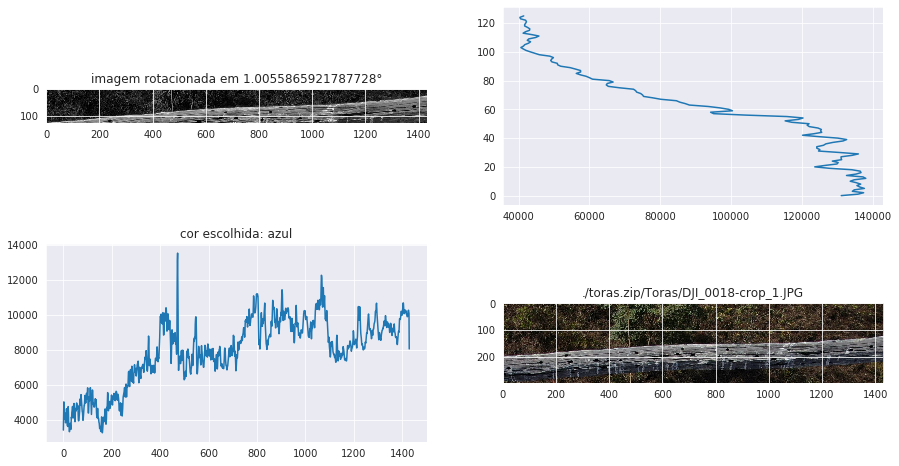

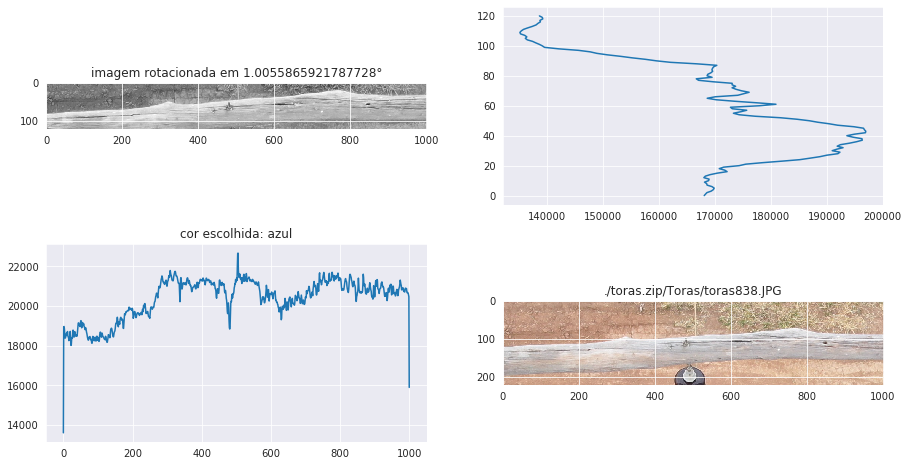

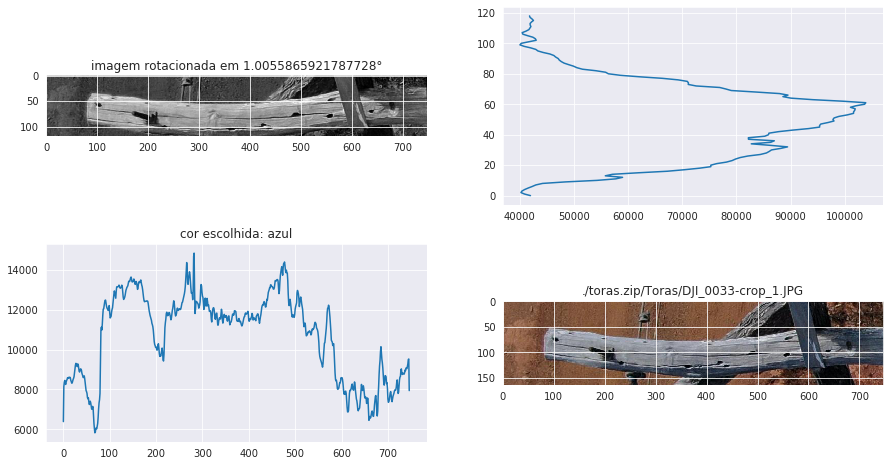

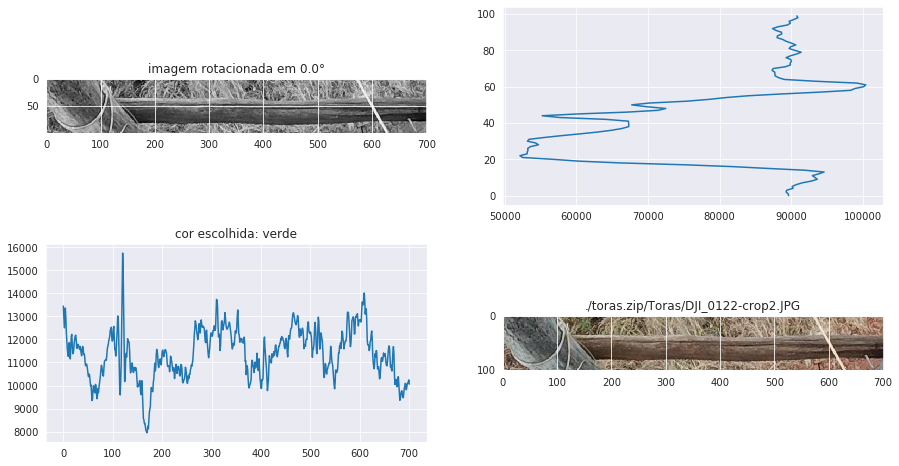

In [3]:
color_dict = {i:s for i, s in enumerate(['vermelho', 'verde', 'azul'])}

for path in path_list:
  # lendo imagem RGB
  img = imread(path)

  # convertendo para o canal com maior variação vertical
  cor_v, cor_h = best_rgb(img)

  color_img = rgb_to_color(img, cor_h)

  new_img, angle = auto_rotate_and_crop(color_img)

  soma_vertical = new_img.sum(axis=0)
  soma_horizontal = new_img.sum(axis=1)

  h, w = new_img.shape
  # Plotando imagens
  fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))
  ax[0, 0].title.set_text(f'imagem rotacionada em {angle}°')
  ax[0, 0].imshow(new_img)

  ax[0, 1].plot(soma_horizontal, range(h-1, -1, -1))

  ax[1, 0].plot(range(w), soma_vertical)
  ax[1, 0].title.set_text(f'cor escolhida: {color_dict[cor_h]}')

  ax[1, 1].title.set_text(path)
  ax[1, 1].imshow(img)

  plt.show()
